In [81]:
import pandas as pd
import os
import matplotlib.pyplot as plt
import numpy as np

df_data = pd.read_csv("../dane/2022VAERSDATA.csv", encoding='latin1', low_memory=False)
df_vax = pd.read_csv("../dane/2022VAERSVAX.csv", encoding='latin1', low_memory=False)
df = pd.merge(df_data, df_vax, on='VAERS_ID')

df.columns

Index(['VAERS_ID', 'RECVDATE', 'STATE', 'AGE_YRS', 'CAGE_YR', 'CAGE_MO', 'SEX',
       'RPT_DATE', 'SYMPTOM_TEXT', 'DIED', 'DATEDIED', 'L_THREAT', 'ER_VISIT',
       'HOSPITAL', 'HOSPDAYS', 'X_STAY', 'DISABLE', 'RECOVD', 'VAX_DATE',
       'ONSET_DATE', 'NUMDAYS', 'LAB_DATA', 'V_ADMINBY', 'V_FUNDBY',
       'OTHER_MEDS', 'CUR_ILL', 'HISTORY', 'PRIOR_VAX', 'SPLTTYPE',
       'FORM_VERS', 'TODAYS_DATE', 'BIRTH_DEFECT', 'OFC_VISIT', 'ER_ED_VISIT',
       'ALLERGIES', 'VAX_TYPE', 'VAX_MANU', 'VAX_LOT', 'VAX_DOSE_SERIES',
       'VAX_ROUTE', 'VAX_SITE', 'VAX_NAME'],
      dtype='object')

In [82]:
df = df[['VAERS_ID', "STATE", "CAGE_YR", "SEX", "DIED", "HOSPITAL", "HOSPDAYS", "NUMDAYS", "VAX_TYPE", "VAX_MANU"]]

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 283454 entries, 0 to 283453
Data columns (total 10 columns):
 #   Column    Non-Null Count   Dtype  
---  ------    --------------   -----  
 0   VAERS_ID  283454 non-null  int64  
 1   STATE     227998 non-null  object 
 2   CAGE_YR   214658 non-null  float64
 3   SEX       283454 non-null  object 
 4   DIED      8248 non-null    object 
 5   HOSPITAL  39676 non-null   object 
 6   HOSPDAYS  23257 non-null   float64
 7   NUMDAYS   228359 non-null  float64
 8   VAX_TYPE  283454 non-null  object 
 9   VAX_MANU  283454 non-null  object 
dtypes: float64(3), int64(1), object(6)
memory usage: 21.6+ MB


In [83]:
df[df["HOSPITAL"]=='Y']["HOSPDAYS"].count()

23257

In [84]:
df = df[df["SEX"].isin(["F", "M"])]
df['SEX'] = df['SEX'].apply(lambda x: 1 if x == 'F' else 0)
df = df.dropna(subset=["STATE", "CAGE_YR", "NUMDAYS"])
df['DIED'] = df['DIED'].apply(lambda x: 1 if x == 'Y' else 0)
df['HOSPITAL'] = df['HOSPITAL'].apply(lambda x: 1 if x == 'Y' else 0)
df['HOSPDAYS'] = pd.to_numeric(df['HOSPDAYS'], errors='coerce').fillna(0)

df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 173665 entries, 208 to 283453
Data columns (total 10 columns):
 #   Column    Non-Null Count   Dtype  
---  ------    --------------   -----  
 0   VAERS_ID  173665 non-null  int64  
 1   STATE     173665 non-null  object 
 2   CAGE_YR   173665 non-null  float64
 3   SEX       173665 non-null  int64  
 4   DIED      173665 non-null  int64  
 5   HOSPITAL  173665 non-null  int64  
 6   HOSPDAYS  173665 non-null  float64
 7   NUMDAYS   173665 non-null  float64
 8   VAX_TYPE  173665 non-null  object 
 9   VAX_MANU  173665 non-null  object 
dtypes: float64(3), int64(4), object(3)
memory usage: 14.6+ MB


In [85]:
######################### STATES #######################
df = df[df["STATE"] != 'SD']
# df = df[df["STATES"].isin(["TN", "WI", "CA"])]

state_counts = df['STATE'].value_counts()
states_to_keep = state_counts[state_counts >= 200].index
df = df[df['STATE'].isin(states_to_keep)]

######################### AGE ########################
df = df[df["CAGE_YR"] >= 55]
df = df[df["CAGE_YR"] <= 100]

#################### VACCINE TYPE ########################
df = df[df["VAX_TYPE"] == 'COVID19']

#################### VACCINE MANU ########################
print(df["VAX_MANU"].value_counts())
# df = df[df["VAX_MANU"] == "JANSSEN"]

#################### HOSPITAL ########################
# df = df[df["HOSPITAL"] == 1]

#################### HOSPDAYS ########################
df = df[df["HOSPDAYS"] <= 30]

#################### NUMDAYS ########################
# df = df[df["NUMDAYS"] >= 1]
df = df[df["NUMDAYS"] <= 90]

VAX_MANU
MODERNA                 34292
PFIZER\BIONTECH         28192
JANSSEN                  2285
NOVAVAX                    77
UNKNOWN MANUFACTURER       64
Name: count, dtype: int64


In [86]:
df = df[df["VAX_MANU"].isin(["MODERNA", "PFIZER\BIONTECH"])]

<>:1: SyntaxWarning: invalid escape sequence '\B'
<>:1: SyntaxWarning: invalid escape sequence '\B'
C:\Users\szyme\AppData\Local\Temp\ipykernel_44696\62556203.py:1: SyntaxWarning: invalid escape sequence '\B'
  df = df[df["VAX_MANU"].isin(["MODERNA", "PFIZER\BIONTECH"])]


In [87]:
df["DIED"].value_counts()

DIED
0    38440
1      955
Name: count, dtype: int64

<Axes: >

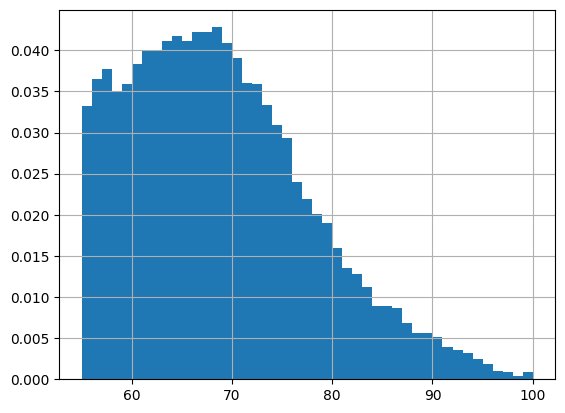

In [88]:
df["CAGE_YR"].hist(bins=45, density=True)

In [89]:
# df = df[df["SEX"].isin(["F", "M"])]
# df = df.dropna(subset=["STATE", "AGE_YRS", "NUMDAYS"])
# df['DIED'] = df['DIED'].apply(lambda x: 1 if x == 'Y' else 0)
# df['HOSPITAL'] = df['HOSPITAL'].apply(lambda x: 1 if x == 'Y' else 0)
# df['HOSPDAYS'] = pd.to_numeric(df['HOSPDAYS'], errors='coerce').fillna(0)
# df = df[df["STATE"] != 'SD']

In [90]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 39395 entries, 242 to 283441
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   VAERS_ID  39395 non-null  int64  
 1   STATE     39395 non-null  object 
 2   CAGE_YR   39395 non-null  float64
 3   SEX       39395 non-null  int64  
 4   DIED      39395 non-null  int64  
 5   HOSPITAL  39395 non-null  int64  
 6   HOSPDAYS  39395 non-null  float64
 7   NUMDAYS   39395 non-null  float64
 8   VAX_TYPE  39395 non-null  object 
 9   VAX_MANU  39395 non-null  object 
dtypes: float64(3), int64(4), object(3)
memory usage: 3.3+ MB


In [91]:
# df = pd.merge(df_data, df_vax, on='VAERS_ID')
# print(df[df["VAX_TYPE"]=="COVID19"]["VAX_MANU"].unique())
# print(df["AGE_YRS"].isna().sum())
# print(df["CAGE_YR"].isna().sum())
# print(df.shape)

# df['DIED'] = df['DIED'].apply(lambda x: 1 if x == 'Y' else 0)
# df['AGE_YRS'] = pd.to_numeric(df['AGE_YRS'], errors='coerce')

# df = df[df["AGE_YRS"] <= 100]
# df = df[df["AGE_YRS"] >= 50]

# # MODERNA
# # PFIZER\BIONTECH
# # UNKNOWN MANUFACTURER
# df = df[df["VAX_MANU"].isin(["PFIZER\BIONTECH","MODERNA"])]
# df = df[df["STATE"]!='SD']

# df = df.dropna(subset=['AGE_YRS'])
# df = df[df["SEX"] != "U"]
# print(df.shape)
# df.columns

In [92]:
df["VAX_TYPE"].value_counts()

VAX_TYPE
COVID19    39395
Name: count, dtype: int64

In [93]:
# df = df[df["VAX_TYPE"]=="COVID19"]
# df = df[df["AGE_YRS"]<=100]
# df.shape

67.96627681710555


<Axes: >

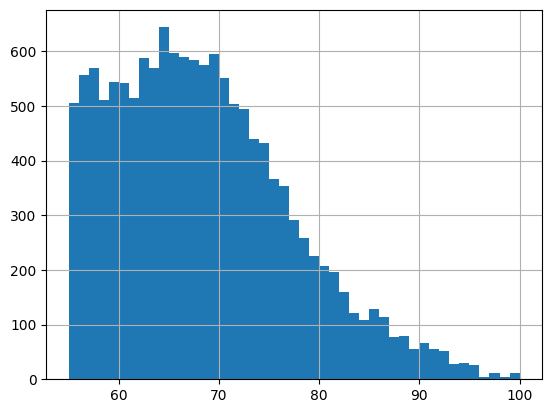

In [123]:
print(df["CAGE_YR"].mean())
df["CAGE_YR"].hist(bins=45)

<Axes: >

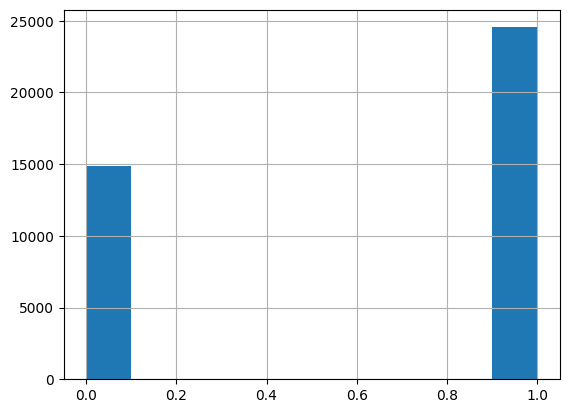

In [95]:
df["SEX"].hist()

In [96]:
df["DIED"].info()

<class 'pandas.core.series.Series'>
Index: 39395 entries, 242 to 283441
Series name: DIED
Non-Null Count  Dtype
--------------  -----
39395 non-null  int64
dtypes: int64(1)
memory usage: 615.5 KB


76.79298245614035
0


C:\Users\szyme\AppData\Local\Temp\ipykernel_44696\4274225938.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  print(df[df["DIED"]==1][df["CAGE_YR"]==1]["CAGE_YR"].count())


<Axes: >

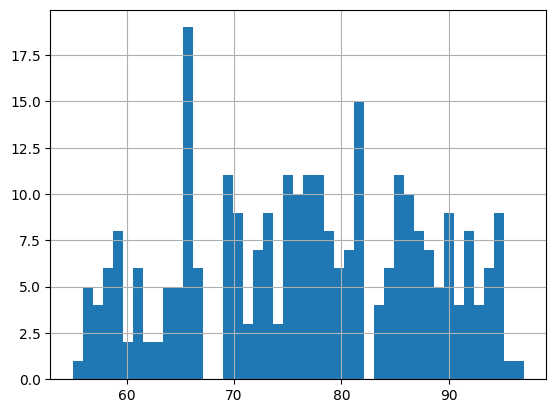

In [124]:
print(df[df["DIED"]==1]["CAGE_YR"].mean())
print(df[df["DIED"]==1][df["CAGE_YR"]==1]["CAGE_YR"].count())
df[df["DIED"]==1]["CAGE_YR"].hist(bins=45)  

0


<Axes: >

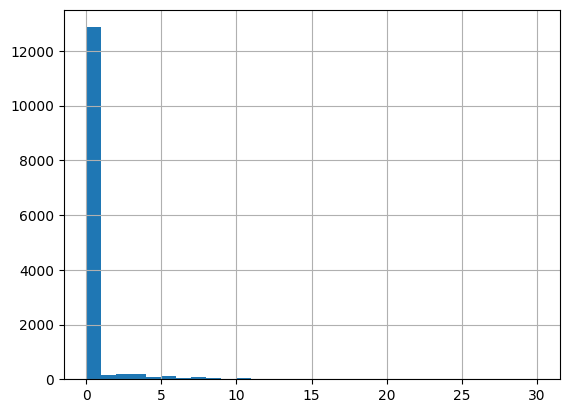

In [125]:
print(df[df["HOSPDAYS"]>100].count().sum())
df[df["HOSPDAYS"]<100]["HOSPDAYS"].hist(bins=30)

<Axes: >

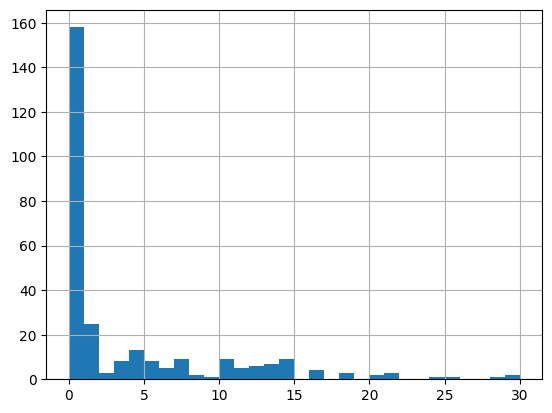

In [126]:
df[df["DIED"]==1]["HOSPDAYS"].hist(bins=30)

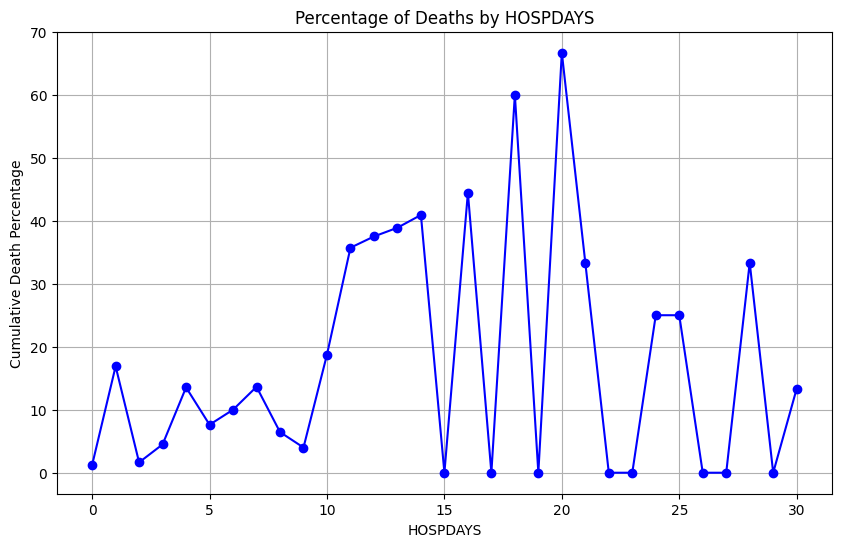

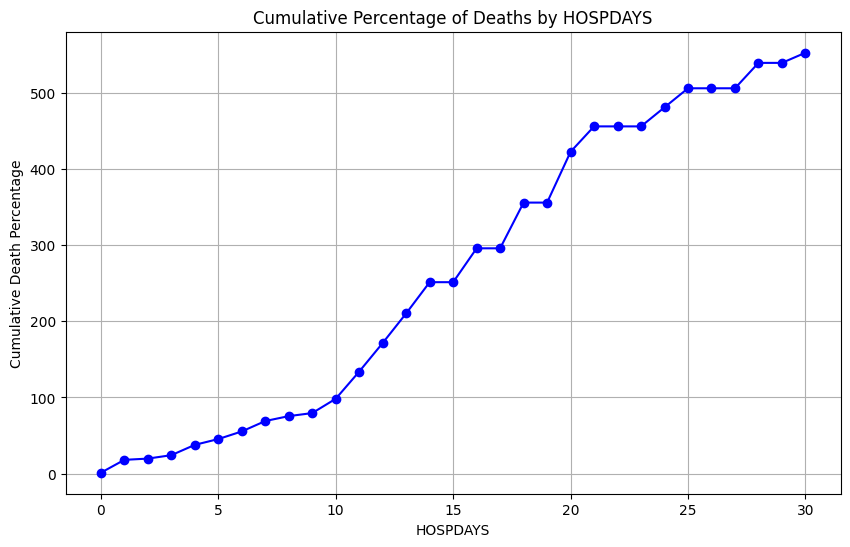

In [127]:
# Group by 'HOSPDAYS' and calculate the percentage of deaths
age_death_percentage_age_yrs = df.groupby('HOSPDAYS')['DIED'].mean() * 100

plt.figure(figsize=(10, 6))
plt.plot(age_death_percentage_age_yrs.index, age_death_percentage_age_yrs.values, marker='o', linestyle='-', color='b')
plt.title('Percentage of Deaths by HOSPDAYS')
plt.xlabel('HOSPDAYS')
plt.ylabel('Cumulative Death Percentage')
plt.grid(True)
plt.show()

cumulative_death_percentage_age_yrs = age_death_percentage_age_yrs.cumsum()

# Plot the cumulative percentage of deaths by age year (AGE_YRS)
plt.figure(figsize=(10, 6))
plt.plot(cumulative_death_percentage_age_yrs.index, cumulative_death_percentage_age_yrs.values, marker='o', linestyle='-', color='b')
plt.title('Cumulative Percentage of Deaths by HOSPDAYS')
plt.xlabel('HOSPDAYS')
plt.ylabel('Cumulative Death Percentage')
plt.grid(True)
plt.show()

955


C:\Users\szyme\AppData\Local\Temp\ipykernel_44696\3799810924.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  print(df[df["DIED"]==1][df["HOSPDAYS"]<50]["HOSPDAYS"].count())
C:\Users\szyme\AppData\Local\Temp\ipykernel_44696\3799810924.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df[df["DIED"]==1][df["HOSPDAYS"]<50]["HOSPDAYS"].hist(bins=30)


<Axes: >

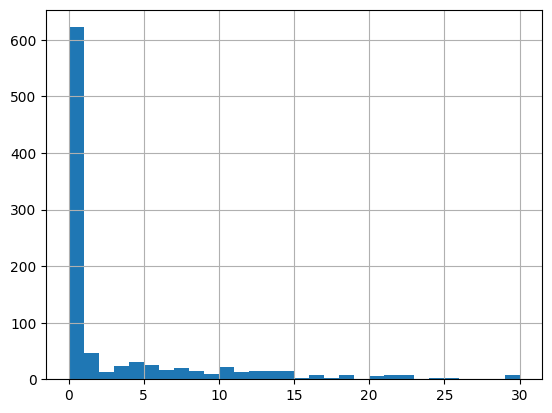

In [101]:
print(df[df["DIED"]==1][df["HOSPDAYS"]<50]["HOSPDAYS"].count())
df[df["DIED"]==1][df["HOSPDAYS"]<50]["HOSPDAYS"].hist(bins=30)

In [102]:
# df["AGE_YRS"].value_counts()

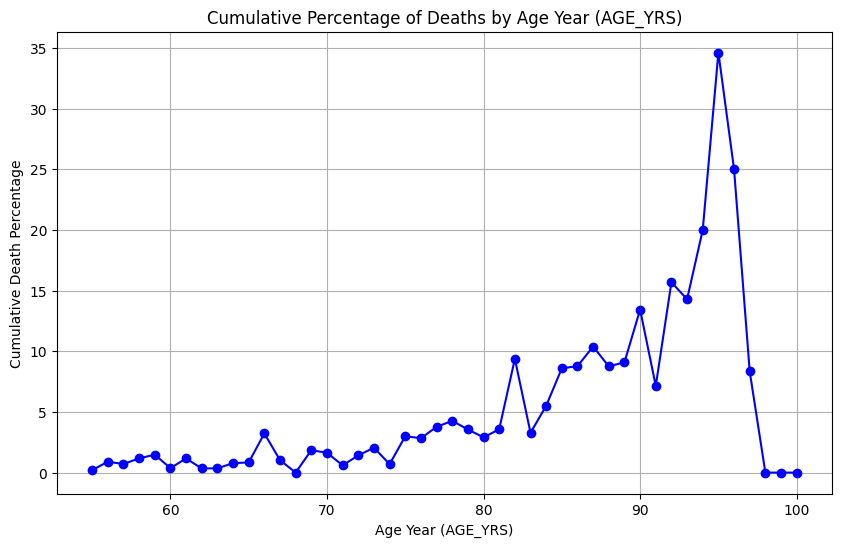

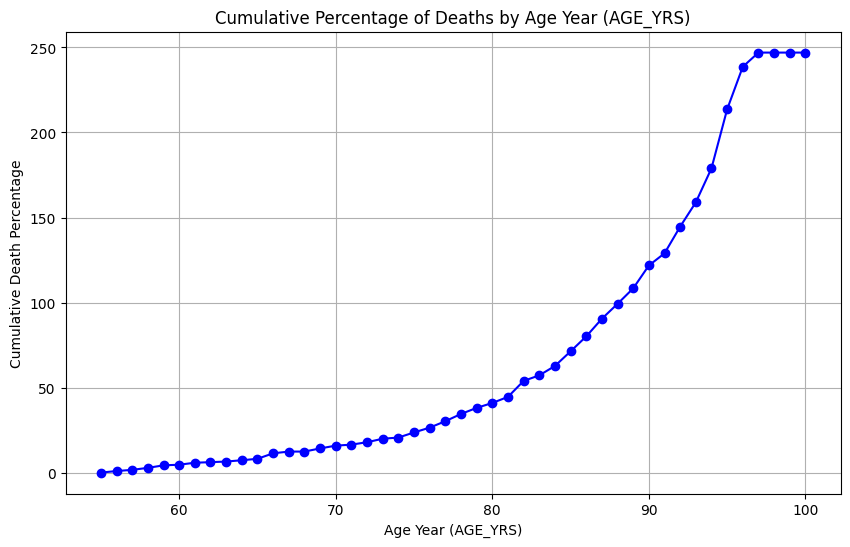

In [128]:
# Group by 'AGE_YRS' and calculate the percentage of deaths
age_death_percentage_age_yrs = df.groupby('CAGE_YR')['DIED'].mean() * 100

plt.figure(figsize=(10, 6))
plt.plot(age_death_percentage_age_yrs.index, age_death_percentage_age_yrs.values, marker='o', linestyle='-', color='b')
plt.title('Cumulative Percentage of Deaths by Age Year (AGE_YRS)')
plt.xlabel('Age Year (AGE_YRS)')
plt.ylabel('Cumulative Death Percentage')
plt.grid(True)
plt.show()

# Calculate the cumulative percentage of deaths by age year (AGE_YRS)
cumulative_death_percentage_age_yrs = age_death_percentage_age_yrs.cumsum()

# Plot the cumulative percentage of deaths by age year (AGE_YRS)
plt.figure(figsize=(10, 6))
plt.plot(cumulative_death_percentage_age_yrs.index, cumulative_death_percentage_age_yrs.values, marker='o', linestyle='-', color='b')
plt.title('Cumulative Percentage of Deaths by Age Year (AGE_YRS)')
plt.xlabel('Age Year (AGE_YRS)')
plt.ylabel('Cumulative Death Percentage')
plt.grid(True)
plt.show()


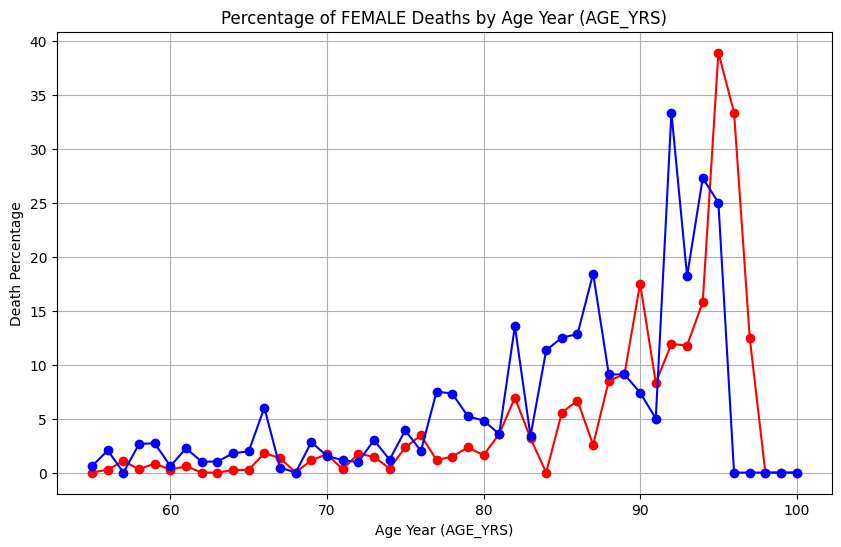

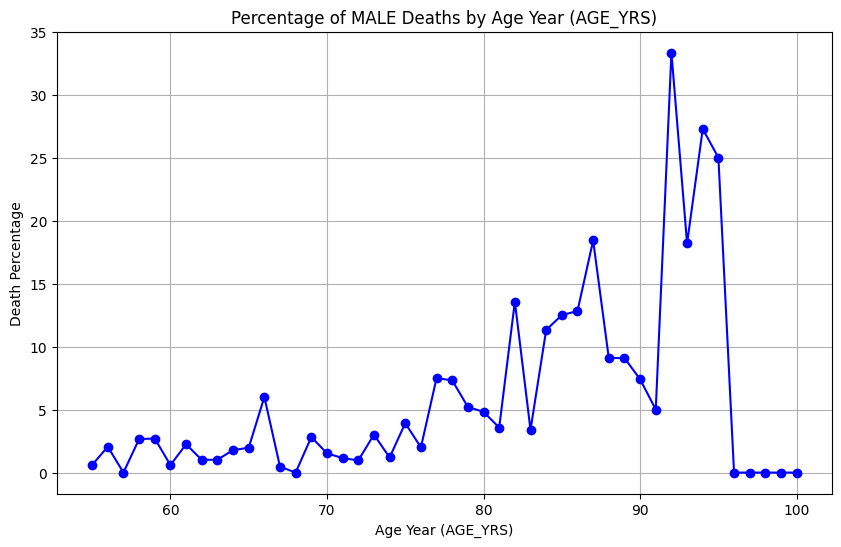

In [129]:
age_death_percentage_age_yrs_f = df[df["SEX"]==1].groupby('CAGE_YR')['DIED'].mean() * 100
age_death_percentage_age_yrs = df[df["SEX"]==0].groupby('CAGE_YR')['DIED'].mean() * 100

plt.figure(figsize=(10, 6))
plt.plot(age_death_percentage_age_yrs_f.index, age_death_percentage_age_yrs_f.values, marker='o', linestyle='-', color='r')
plt.plot(age_death_percentage_age_yrs.index, age_death_percentage_age_yrs.values, marker='o', linestyle='-', color='b')
plt.title('Percentage of FEMALE Deaths by Age Year (AGE_YRS)')
plt.xlabel('Age Year (AGE_YRS)')
plt.ylabel('Death Percentage')
plt.grid(True)
plt.show()

age_death_percentage_age_yrs = df[df["SEX"]==0].groupby('CAGE_YR')['DIED'].mean() * 100

plt.figure(figsize=(10, 6))
plt.plot(age_death_percentage_age_yrs.index, age_death_percentage_age_yrs.values, marker='o', linestyle='-', color='b')
plt.title('Percentage of MALE Deaths by Age Year (AGE_YRS)')
plt.xlabel('Age Year (AGE_YRS)')
plt.ylabel('Death Percentage')
plt.grid(True)
plt.show()

In [105]:
# print(df[df["SEX"]=="M"][df["AGE_YRS"]>90].shape)
# print(df[df["SEX"]=="F"][df["AGE_YRS"]>90].shape)

In [106]:
df["VAX_MANU"].value_counts()

VAX_MANU
MODERNA            22392
PFIZER\BIONTECH    17003
Name: count, dtype: int64

In [107]:
df[df["DIED"]==1]["VAX_MANU"].value_counts()

VAX_MANU
PFIZER\BIONTECH    483
MODERNA            472
Name: count, dtype: int64

In [108]:
# df[df["AGE_YRS"]>80]["VAX_MANU"].value_counts()

## NUMDAYS

In [109]:
df = df.dropna(subset=["NUMDAYS"])
# df["NUMDAYS"].unique()
df = df[df["NUMDAYS"]<700]

<Axes: >

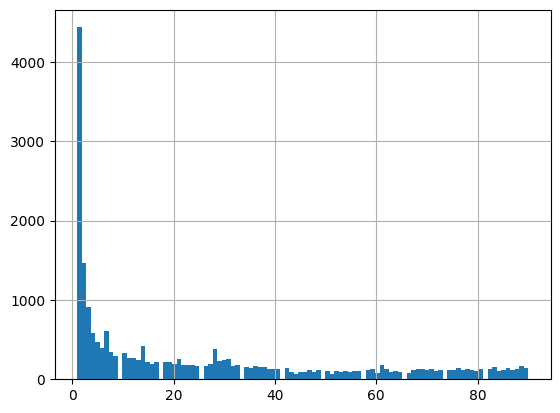

In [110]:
df[df["NUMDAYS"]>=1]["NUMDAYS"].hist(bins=100)

VAERS_ID    2189
STATE       2189
CAGE_YR     2189
SEX         2189
DIED        2189
HOSPITAL    2189
HOSPDAYS    2189
NUMDAYS     2189
VAX_TYPE    2189
VAX_MANU    2189
dtype: int64


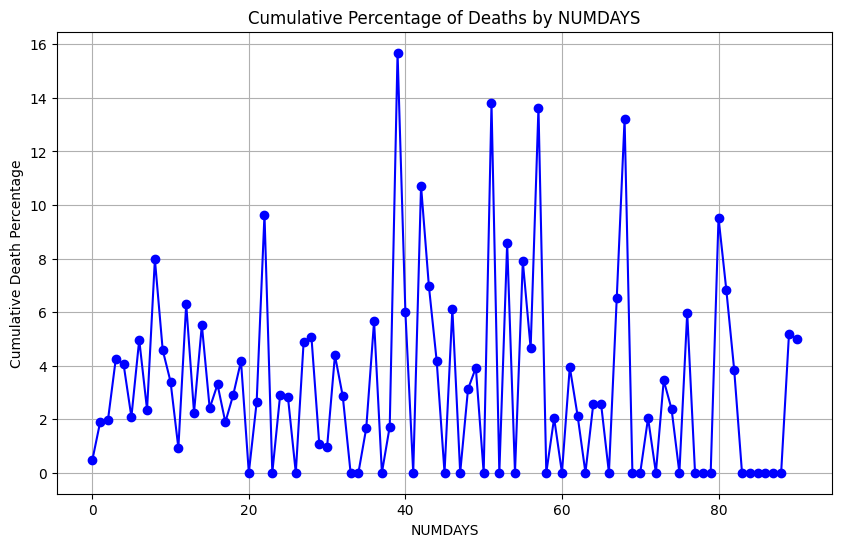

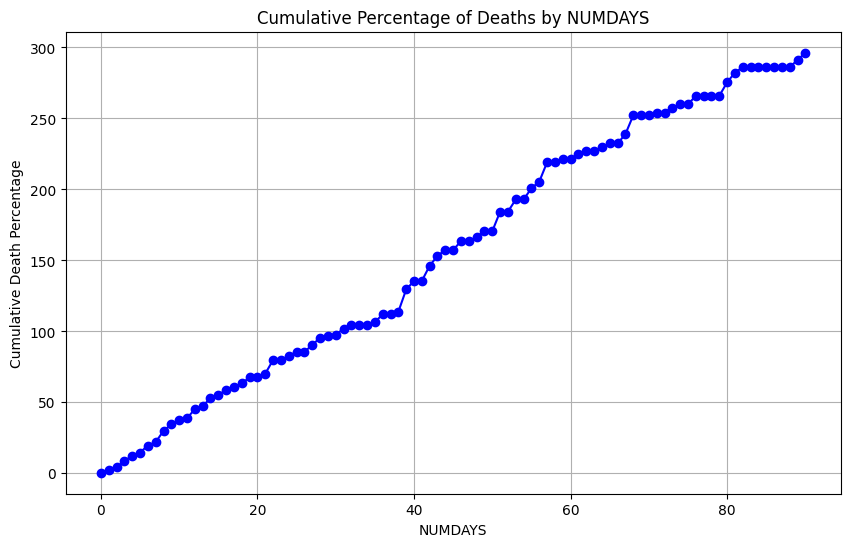

In [130]:
# Group by 'AGE_YRS' and calculate the percentage of deaths
print(df[df["NUMDAYS"]>40].count())

age_death_percentage_age_yrs = df.groupby('NUMDAYS')['DIED'].mean() * 100

plt.figure(figsize=(10, 6))
plt.plot(age_death_percentage_age_yrs.index, age_death_percentage_age_yrs.values, marker='o', linestyle='-', color='b')
plt.title('Cumulative Percentage of Deaths by NUMDAYS')
plt.xlabel('NUMDAYS')
plt.ylabel('Cumulative Death Percentage')
plt.grid(True)
plt.show()

# Calculate the cumulative percentage of deaths by age year (AGE_YRS)
cumulative_death_percentage_age_yrs = age_death_percentage_age_yrs.cumsum()

# Plot the cumulative percentage of deaths by age year (AGE_YRS)
plt.figure(figsize=(10, 6))
plt.plot(cumulative_death_percentage_age_yrs.index, cumulative_death_percentage_age_yrs.values, marker='o', linestyle='-', color='b')
plt.title('Cumulative Percentage of Deaths by NUMDAYS')
plt.xlabel('NUMDAYS')
plt.ylabel('Cumulative Death Percentage')
plt.grid(True)
plt.show()

# STANY

In [112]:
df = df.dropna(subset=["STATE"])
print(df["STATE"].value_counts().count())
df["STATE"].value_counts()

51


STATE
CA    4120
CO    3280
MI    1949
TX    1941
NY    1918
FL    1910
OH    1410
PA    1392
MA    1276
AZ    1223
WA    1124
VA    1120
IL    1109
MN    1094
NJ    1008
WI     944
NC     943
GA     878
MD     827
IN     729
OR     677
MO     626
TN     583
KY     551
PR     494
SC     470
CT     442
NV     436
OK     365
MS     362
IA     353
NH     351
ID     316
AL     312
AR     298
KS     282
ME     244
NM     220
LA     201
NE     199
UT     171
HI     164
MT     153
RI     142
DE     141
WV     139
VT     131
WY     114
ND     100
DC      84
AK      79
Name: count, dtype: int64

In [113]:
abv_list = df["STATE"].value_counts()[:-7].index

In [114]:
abbreviations_list = ["AL", "KY", "OH", "AK", "LA", "OK", "AZ", "ME", "OR", "AR", "MD", "PA", "AS", "MA", "PR", 
    "CA", "MI", "RI", "CO", "MN", "SC", "CT", "MS", "SD", "DE", "MO", "TN", "DC", "MT", "TX", "FL", "NE", "TT",
    "GA", "NV", "UT", "GU", "NH", "VT", "HI", "NJ", "VA","ID", "NM", "VI", "IL", "NY", "WA", "IN", "NC", "WV",
    "IA", "ND", "WI", "KS", "MP", "WY"
]

df = df[df["STATE"].isin(abv_list)]
print(df["STATE"].value_counts().count())

44


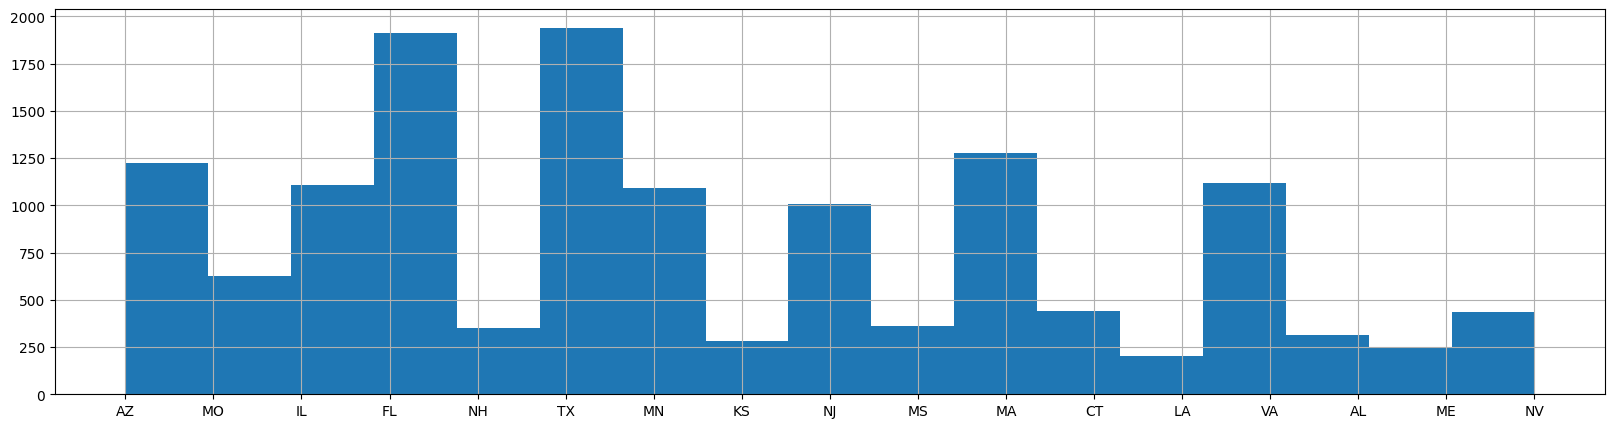

In [135]:
plt.figure(figsize=(20,5))
df["STATE"].hist(bins=17)
plt.show()

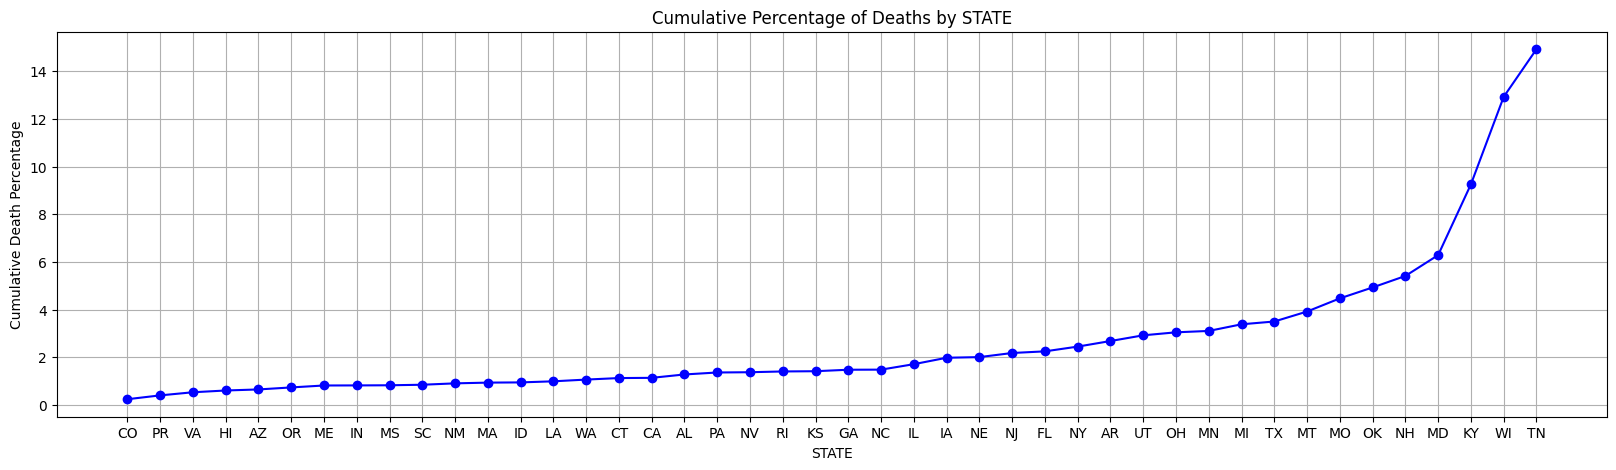

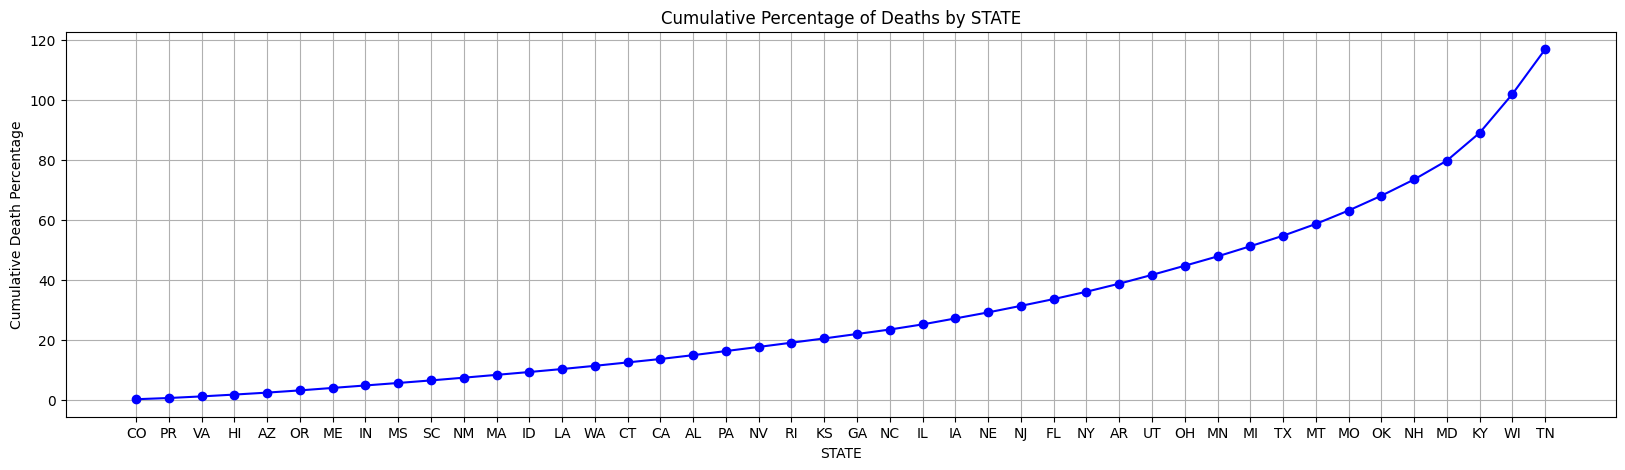

In [116]:
age_death_percentage_age_yrs = (df.groupby('STATE')['DIED'].mean() * 100).sort_values()

plt.figure(figsize=(20, 5))
plt.plot(age_death_percentage_age_yrs.index, age_death_percentage_age_yrs.values, marker='o', linestyle='-', color='b')
plt.title('Cumulative Percentage of Deaths by STATE')
plt.xlabel('STATE')
plt.ylabel('Cumulative Death Percentage')
plt.grid(True)
plt.show()

# Calculate the cumulative percentage of deaths by age year (AGE_YRS)
cumulative_death_percentage_age_yrs = age_death_percentage_age_yrs.cumsum()

# Plot the cumulative percentage of deaths by age year (AGE_YRS)
plt.figure(figsize=(20, 5))
plt.plot(cumulative_death_percentage_age_yrs.index, cumulative_death_percentage_age_yrs.values, marker='o', linestyle='-', color='b')
plt.title('Cumulative Percentage of Deaths by STATE')
plt.xlabel('STATE')
plt.ylabel('Cumulative Death Percentage')
plt.grid(True)
plt.show()

# GA     2597
# TN     2380
# MO     2322
# IN     2232
# OR     2073

In [122]:
df = df[df["STATE"].isin(["VA", "AZ", "ME", "MS", "MA", "LA", "CT", "AL", "NV", "KS", "IL", "FL", "MN", "TX", "MO", "NH", "NJ"])]

In [121]:
df["STATE"].count()

13937

In [66]:
age_death_percentage_age_yrs

STATE
CO     0.243902
PR     0.404858
VA     0.535714
HI     0.609756
AZ     0.654129
OR     0.738552
ME     0.819672
IN     0.823045
MS     0.828729
SC     0.851064
NM     0.909091
MA     0.940439
ID     0.949367
LA     0.995025
WA     1.067616
CT     1.131222
CA     1.140777
AL     1.282051
PA     1.364943
NV     1.376147
RI     1.408451
KS     1.418440
GA     1.480638
NC     1.484624
IL     1.713255
IA     1.983003
NE     2.010050
NJ     2.182540
FL     2.251309
NY     2.450469
AR     2.684564
UT     2.923977
OH     3.049645
MN     3.107861
MI     3.386352
TX     3.503349
MT     3.921569
MO     4.472843
OK     4.931507
NH     5.413105
MD     6.287787
KY     9.255898
WI    12.923729
TN    14.922813
Name: DIED, dtype: float64

In [67]:
df[df['STATE'].isin(["TN", "WI", "TX", "MT", "MO", "MN", "OK", "MI", "AR", "OH", "NH", "IA", "ND"])]["STATE"].value_counts()

STATE
MI    1949
TX    1941
OH    1410
MN    1094
WI     944
MO     626
TN     583
OK     365
IA     353
NH     351
AR     298
MT     153
Name: count, dtype: int64

In [68]:
df[df["STATE"]=='TX'].shape

(1941, 10)

In [69]:
df["VAX_MANU"].value_counts()

VAX_MANU
MODERNA            21950
PFIZER\BIONTECH    16657
Name: count, dtype: int64

# Producent

In [70]:
df["VAX_MANU"].value_counts()

VAX_MANU
MODERNA            21950
PFIZER\BIONTECH    16657
Name: count, dtype: int64

<Axes: >

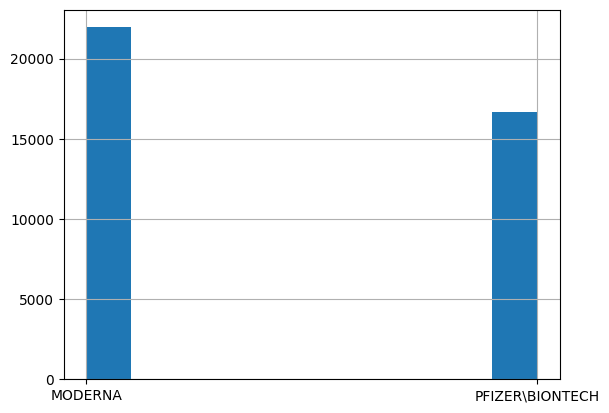

In [71]:
df["VAX_MANU"].hist()

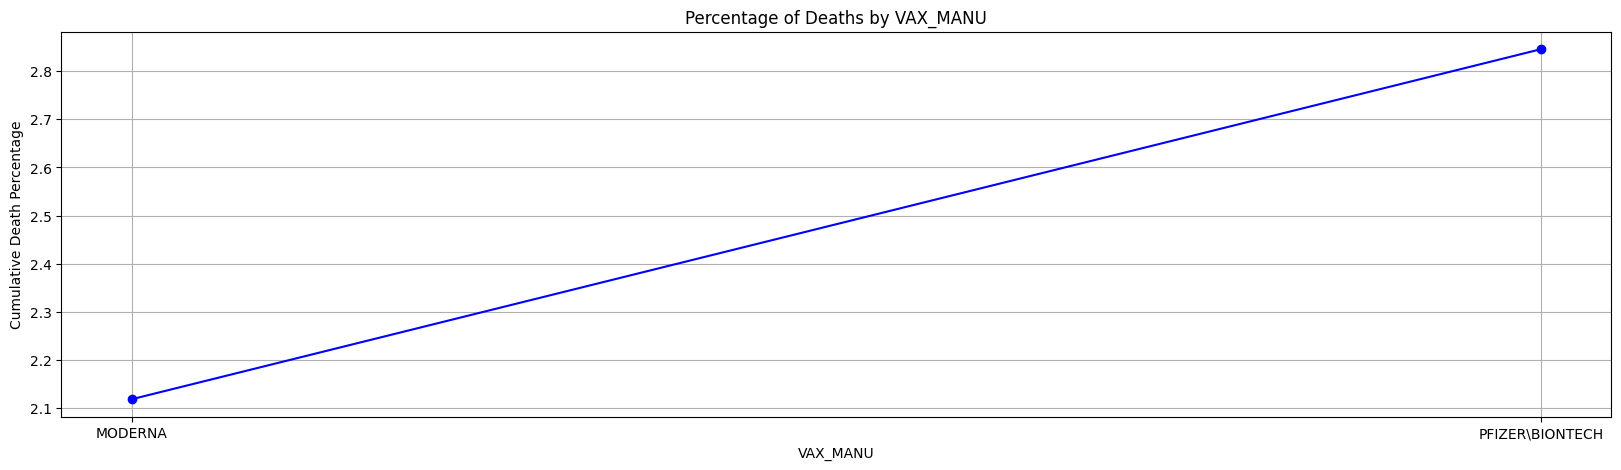

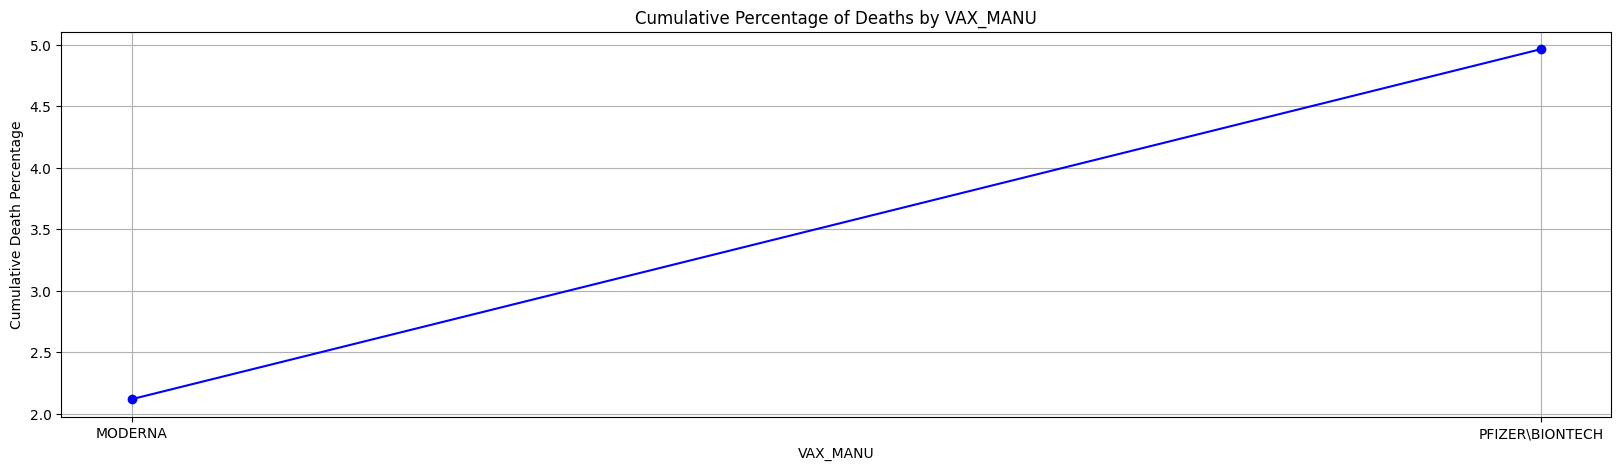

In [72]:
age_death_percentage_age_yrs = (df.groupby('VAX_MANU')['DIED'].mean() * 100)

plt.figure(figsize=(20, 5))
plt.plot(age_death_percentage_age_yrs.index, age_death_percentage_age_yrs.values, marker='o', linestyle='-', color='b')
plt.title('Percentage of Deaths by VAX_MANU')
plt.xlabel('VAX_MANU')
plt.ylabel('Cumulative Death Percentage')
plt.grid(True)
plt.show()

# Calculate the cumulative percentage of deaths by age year (AGE_YRS)
cumulative_death_percentage_age_yrs = age_death_percentage_age_yrs.cumsum()

# Plot the cumulative percentage of deaths by age year (AGE_YRS)
plt.figure(figsize=(20, 5))
plt.plot(cumulative_death_percentage_age_yrs.index, cumulative_death_percentage_age_yrs.values, marker='o', linestyle='-', color='b')
plt.title('Cumulative Percentage of Deaths by VAX_MANU')
plt.xlabel('VAX_MANU')
plt.ylabel('Cumulative Death Percentage')
plt.grid(True)
plt.show()

<Axes: >

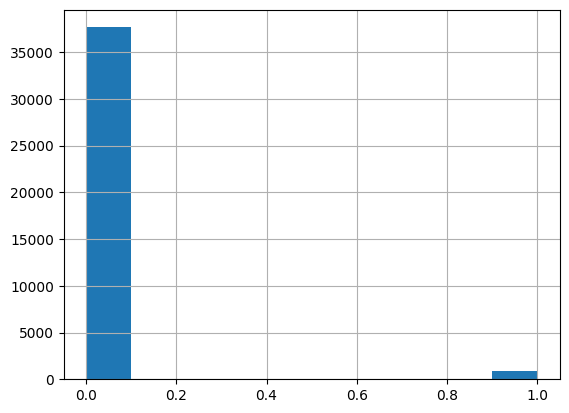

In [73]:
df["DIED"].hist()

In [74]:
df['DISABLE'].hist()

KeyError: 'DISABLE'

<Axes: >

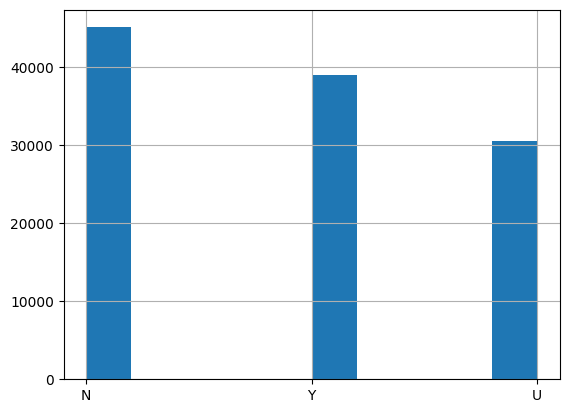

In [ ]:
df['RECOVD'].hist()

# RECOVERD

In [ ]:
df = df[df["RECOVD"].isin(["Y", "N"])]
df['RECOVD'] = df['RECOVD'].apply(lambda x: 1 if x == 'Y' else 0)

<Axes: >

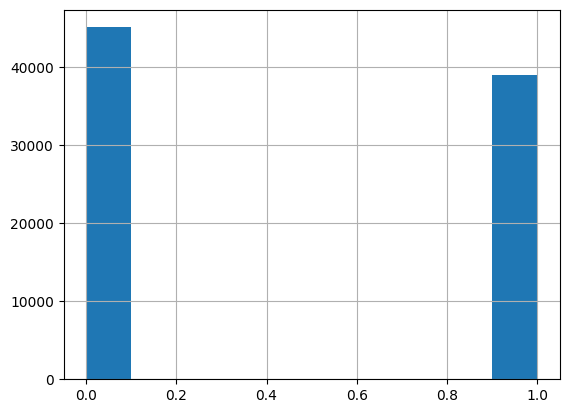

In [ ]:
df['RECOVD'].hist()

<Axes: >

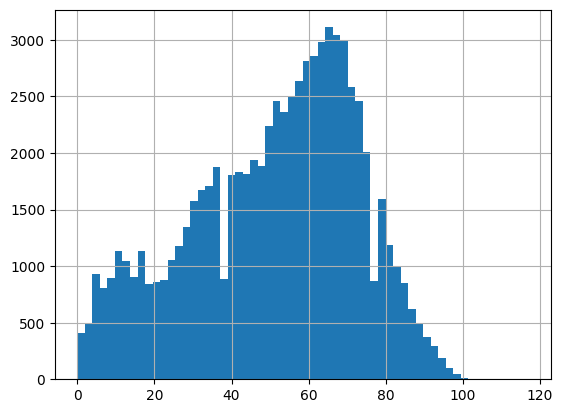

In [ ]:
df["CAGE_YR"].hist(bins=60)

<Axes: >

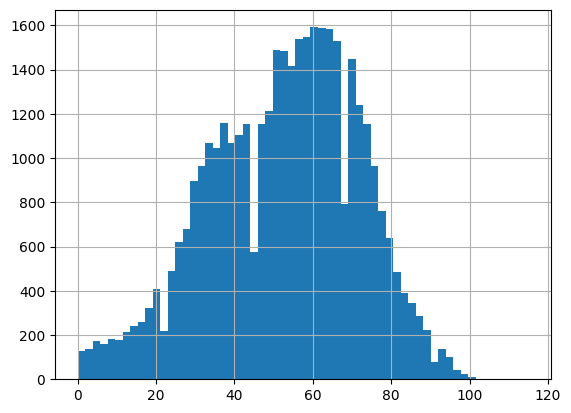

In [ ]:
df[df['RECOVD']==0]["CAGE_YR"].hist(bins=60)

<Axes: >

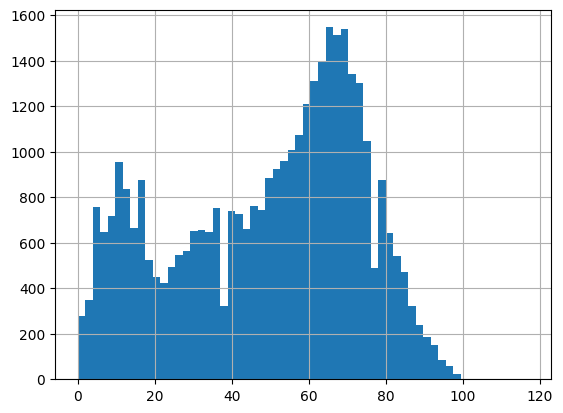

In [ ]:
df[df['RECOVD']==1]["CAGE_YR"].hist(bins=60)

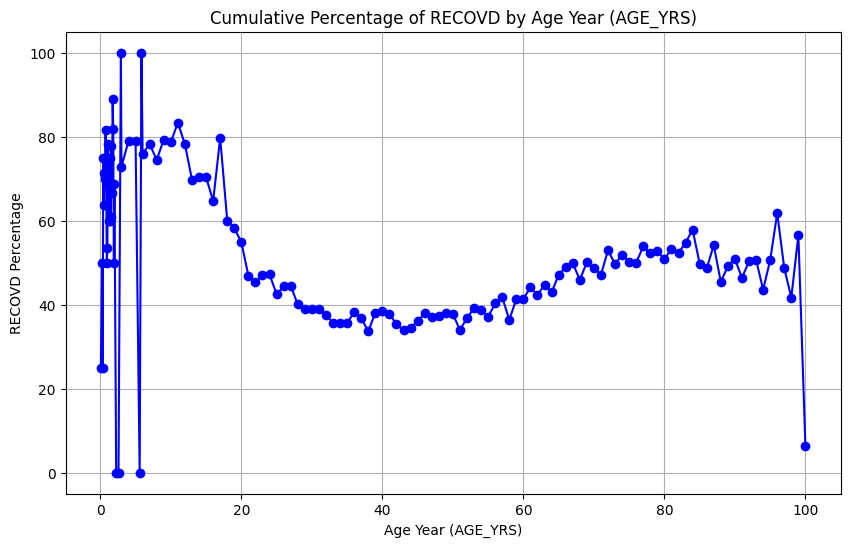

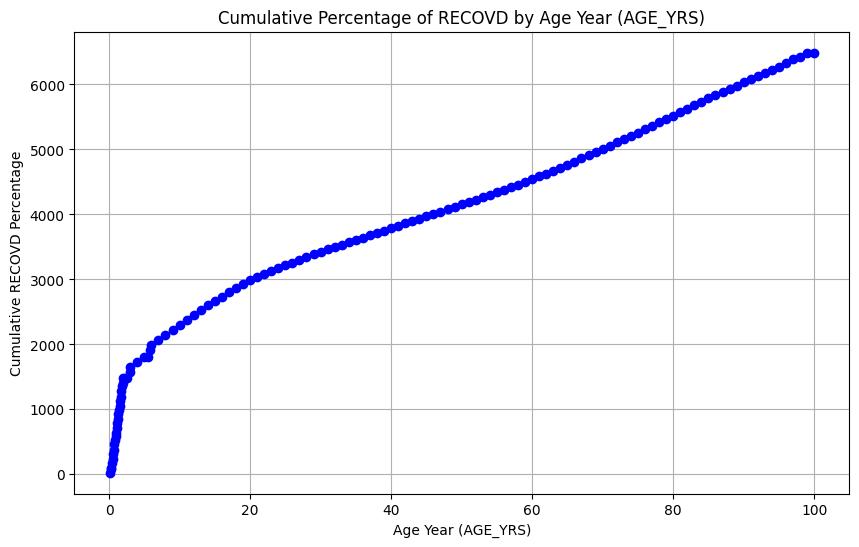

In [ ]:
# Group by 'AGE_YRS' and calculate the percentage of deaths
age_death_percentage_age_yrs = df.groupby('AGE_YRS')['RECOVD'].mean() * 100

plt.figure(figsize=(10, 6))
plt.plot(age_death_percentage_age_yrs.index, age_death_percentage_age_yrs.values, marker='o', linestyle='-', color='b')
plt.title('Cumulative Percentage of RECOVD by Age Year (AGE_YRS)')
plt.xlabel('Age Year (AGE_YRS)')
plt.ylabel('RECOVD Percentage')
plt.grid(True)
plt.show()

# Calculate the cumulative percentage of deaths by age year (AGE_YRS)
cumulative_death_percentage_age_yrs = age_death_percentage_age_yrs.cumsum()

# Plot the cumulative percentage of deaths by age year (AGE_YRS)
plt.figure(figsize=(10, 6))
plt.plot(cumulative_death_percentage_age_yrs.index, cumulative_death_percentage_age_yrs.values, marker='o', linestyle='-', color='b')
plt.title('Cumulative Percentage of RECOVD by Age Year (AGE_YRS)')
plt.xlabel('Age Year (AGE_YRS)')
plt.ylabel('Cumulative RECOVD Percentage')
plt.grid(True)
plt.show()

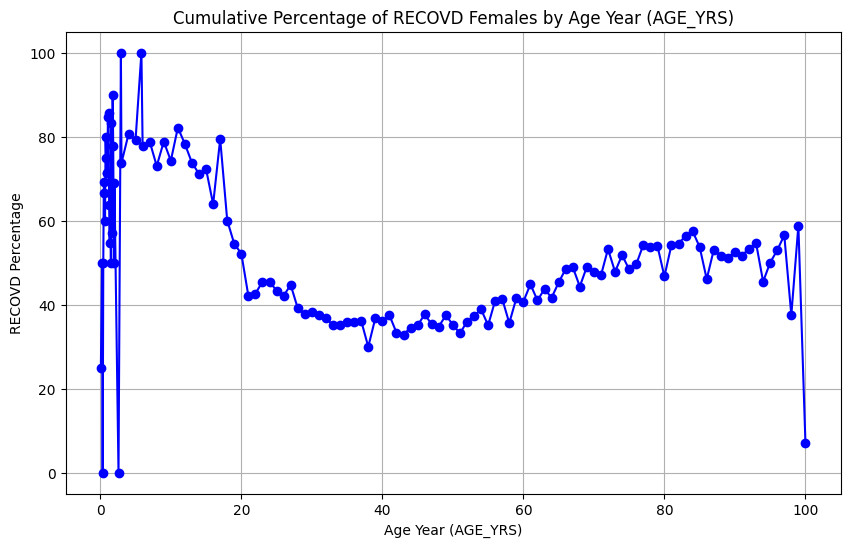

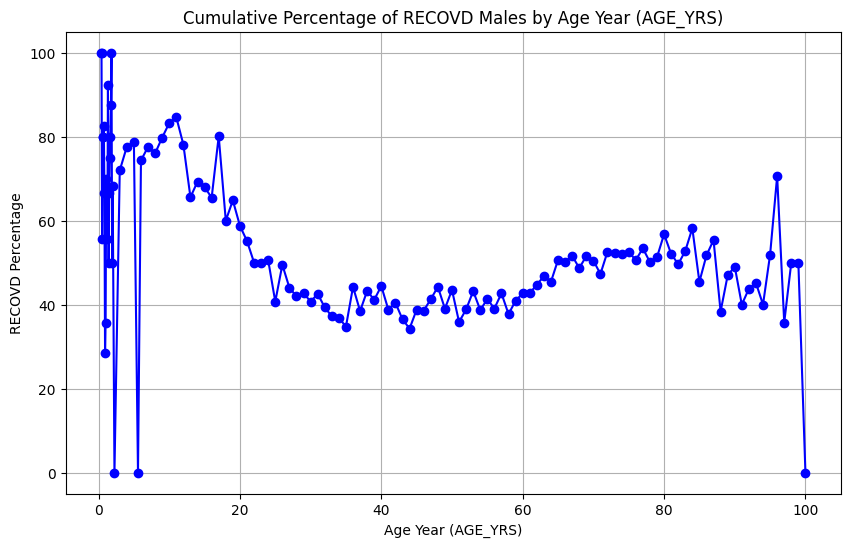

In [ ]:
age_death_percentage_age_yrs = df[df["SEX"]=='F'].groupby('AGE_YRS')['RECOVD'].mean() * 100

plt.figure(figsize=(10, 6))
plt.plot(age_death_percentage_age_yrs.index, age_death_percentage_age_yrs.values, marker='o', linestyle='-', color='b')
plt.title('Cumulative Percentage of RECOVD Females by Age Year (AGE_YRS)')
plt.xlabel('Age Year (AGE_YRS)')
plt.ylabel('RECOVD Percentage')
plt.grid(True)
plt.show()

age_death_percentage_age_yrs = df[df["SEX"]=='M'].groupby('AGE_YRS')['RECOVD'].mean() * 100

plt.figure(figsize=(10, 6))
plt.plot(age_death_percentage_age_yrs.index, age_death_percentage_age_yrs.values, marker='o', linestyle='-', color='b')
plt.title('Cumulative Percentage of RECOVD Males by Age Year (AGE_YRS)')
plt.xlabel('Age Year (AGE_YRS)')
plt.ylabel('RECOVD Percentage')
plt.grid(True)
plt.show()

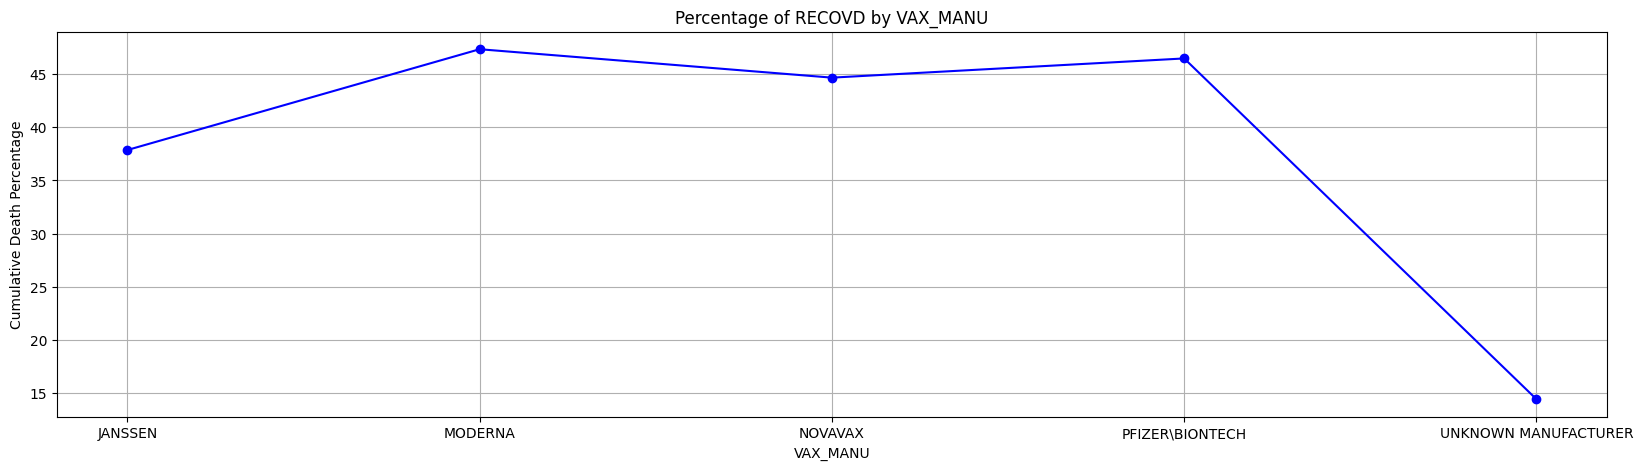

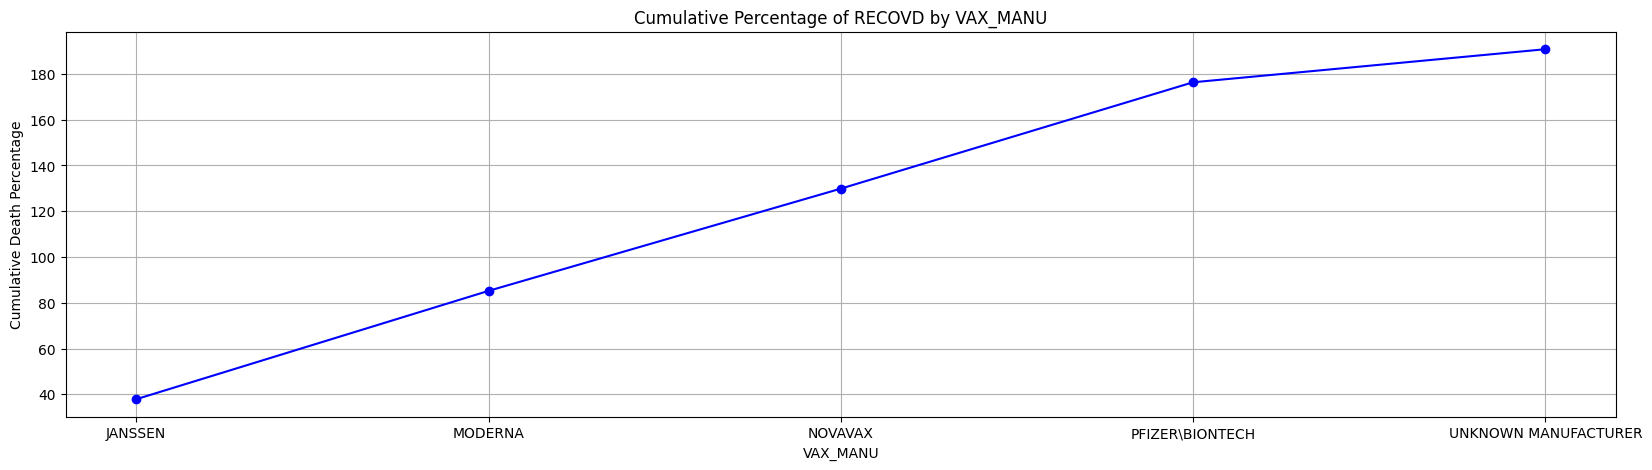

In [ ]:
age_death_percentage_age_yrs = (df.groupby('VAX_MANU')['RECOVD'].mean() * 100)

plt.figure(figsize=(20, 5))
plt.plot(age_death_percentage_age_yrs.index, age_death_percentage_age_yrs.values, marker='o', linestyle='-', color='b')
plt.title('Percentage of RECOVD by VAX_MANU')
plt.xlabel('VAX_MANU')
plt.ylabel('Cumulative Death Percentage')
plt.grid(True)
plt.show()

# Calculate the cumulative percentage of deaths by age year (AGE_YRS)
cumulative_death_percentage_age_yrs = age_death_percentage_age_yrs.cumsum()

# Plot the cumulative percentage of deaths by age year (AGE_YRS)
plt.figure(figsize=(20, 5))
plt.plot(cumulative_death_percentage_age_yrs.index, cumulative_death_percentage_age_yrs.values, marker='o', linestyle='-', color='b')
plt.title('Cumulative Percentage of RECOVD by VAX_MANU')
plt.xlabel('VAX_MANU')
plt.ylabel('Cumulative Death Percentage')
plt.grid(True)
plt.show()